<font size="+5">#08. Cluster Analysis con k-Means</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [3]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevroelt chevelle malibu,16.0,6,250.0,105.0,3897,18.5,75,usa
datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
honda civic,38.0,4,91.0,67.0,1965,15.0,82,japan
datsun 610,22.0,4,108.0,94.0,2379,16.5,73,japan
datsun 200-sx,23.9,4,119.0,97.0,2405,14.9,78,japan
dodge st. regis,18.2,8,318.0,135.0,3830,15.2,79,usa
ford escort 4w,34.4,4,98.0,65.0,2045,16.2,81,usa
plymouth reliant,30.0,4,135.0,84.0,2385,12.9,81,usa
oldsmobile delta 88 royale,12.0,8,350.0,160.0,4456,13.5,72,usa


# Seleccionar 2 Variables para el Análisis de Clúster

> En este caso **ambas variables son explicativas**. La variable que queremos predecir no se la damos al modelo. Sino que tratará de adivinarla en base a cómo de cerca estén los puntos.

In [4]:
dfsel = df[['mpg', 'acceleration']].copy()

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
import pandas as pd

In [17]:
dfnorm = pd.DataFrame(scaler.fit_transform(dfsel), columns=dfsel.columns, index=dfsel.index)

# Scatterplot con las Variables

> Deberíamos observar en la gráfica cuántos posibles grupos podríamos hacer para agrupar los puntos.

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

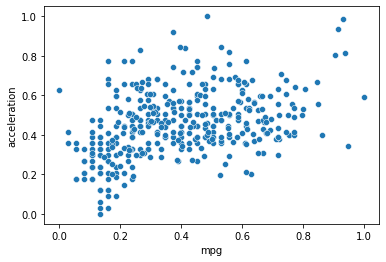

In [18]:
sns.scatterplot(x='mpg', y='acceleration', data=dfnorm)

# Transformación de los Datos

> Deberíamos valorar si tenemos que realizar algunos cambios a los datos para que el modelo de k-Means se compute adecuadamente y pueda comparar ambas variables.
>
> Las variables originales pueden tener un rango de valores diferente.
>
> Imaginemos que tenemos dos variables:
>
> - Peso (en kilogramos)
> - Altura (en metros)
>
> **Es lo mismo** incrementar 1 kilogramo de peso, que incrementar 1 metro de altura?
> 
> - Hazte las mismas preguntas con tus variables.

# Entrenar Modelo `KMeans()`

> Podremos predecir 1, 2, 3,..., k grupos. Tantos como queramos. Sin embargo, seleccionaremos `n_cluster = 3` para no complicarnos la vida.
> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [41]:
dfnorm = dfnorm[['mpg', 'acceleration']]

In [42]:
model = KMeans(n_clusters=1)

In [45]:
model.fit(X=dfnorm)

KMeans(n_clusters=1)

In [46]:
model.inertia_

27.851674663710998

In [51]:
def calcular_error(pepa):
    model = KMeans(n_clusters=pepa)

    model.fit(X=dfnorm)

    error = model.inertia_

    return error

In [52]:
calcular_error(1)

27.851674663710998

In [54]:
for algo in [1,2,3,4,5,6,7,8,9,10]:
    error = calcular_error(algo)
    
    print(error)

27.851674663710998
14.241356630170085
9.760509464123619
7.487331370547567
5.9821868600712165
5.0863088691496765
4.379104973360375
3.897508614107763
3.47679077401364
3.0559955310528055


In [55]:
wss = []
for algo in [1,2,3,4,5,6,7,8,9,10]:
    error = calcular_error(algo)
    
    wss.append(error)

In [57]:
intentos = [1,2,3,4,5,6,7,8,9,10]

In [58]:
wss

[27.851674663710998,
 14.241356630170085,
 9.760509464123619,
 7.487883932020559,
 5.974628501306633,
 5.150071770444384,
 4.3992306007193696,
 3.8438438696437967,
 3.415080833492554,
 3.067536770038536]

<AxesSubplot:>

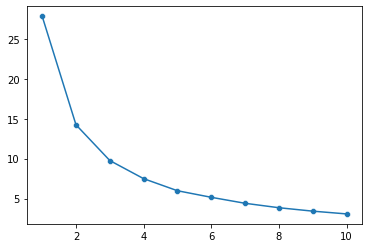

In [60]:
sns.scatterplot(x=intentos, y=wss)
sns.lineplot(x=intentos, y=wss)

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=3)

In [61]:
model = KMeans(n_clusters=4, verbose=2)

In [62]:
model.fit(X=dfnorm)

Initialization complete
Iteration 0, inertia 8.436286529852627
Iteration 1, inertia 7.6603105637854325
Iteration 2, inertia 7.622294028204727
Iteration 3, inertia 7.605125866908202
Iteration 4, inertia 7.601681348125802
Iteration 5, inertia 7.5967979783754895
Iteration 6, inertia 7.59318768461878
Iteration 7, inertia 7.588232204395121
Iteration 8, inertia 7.585894799598841
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 9.644745226444284
Iteration 1, inertia 8.021473005320795
Iteration 2, inertia 7.736520696286065
Iteration 3, inertia 7.680243640037563
Iteration 4, inertia 7.604174653558081
Iteration 5, inertia 7.542252879204956
Iteration 6, inertia 7.533443572470982
Iteration 7, inertia 7.529700743696186
Iteration 8, inertia 7.527774331189459
Iteration 9, inertia 7.5232552493660085
Iteration 10, inertia 7.517904098302859
Iteration 11, inertia 7.5043290861684
Iteration 12, inertia 7.493617933267427
Iteration 13, inertia 7.48958632747858
Iterat

KMeans(n_clusters=4, verbose=2)

# Realizar Predicciones

> - `model.predict()`

In [63]:
dfpred = dfnorm

In [64]:
dfpred['cluster'] = model.predict(dfnorm)

In [65]:
dfnorm.head()

,mpg,acceleration,cluster
name,,,
chevrolet chevelle malibu,0.239362,0.238095,0
buick skylark 320,0.159574,0.208333,0
plymouth satellite,0.239362,0.178571,0
amc rebel sst,0.186170,0.238095,0
ford torino,0.212766,0.148810,0


# Visualizar Modelo

> - Scatterplot con puntos coloreados según el grupo al que pertenece cada observación: `hue = model.labels_`
> - Añade otra capa de puntos, los cuales indicarán los centroides (se encuentran en `model.cluster_centers_`)

In [66]:
df_centroides = pd.DataFrame(model.cluster_centers_, columns=['mpg', 'acceleration'])

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

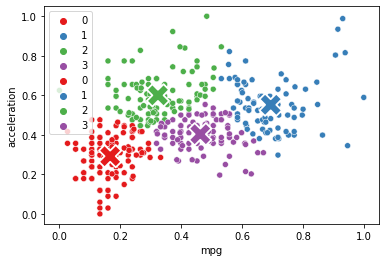

In [67]:
sns.scatterplot(x='mpg', y='acceleration', data=dfpred, hue= 'cluster', palette='Set1')
sns.scatterplot(x='mpg', y='acceleration', data=df_centroides, hue= df_centroides.index, palette='Set1', s=500, marker='X')

In [70]:
dfnorm.head()

,mpg,acceleration,cluster
name,,,
chevrolet chevelle malibu,0.239362,0.238095,0
buick skylark 320,0.159574,0.208333,0
plymouth satellite,0.239362,0.178571,0
amc rebel sst,0.186170,0.238095,0
ford torino,0.212766,0.148810,0


In [71]:
model.predict(X=[[0.2, 0.3]])

array([0], dtype=int32)

# Interpretar Modelo

> 1. Si tuvieras que ponerle nombre a cada grupo, ¿cuál le darías?
> 2. ¿En qué te basas para ello?

In [68]:
dfpred.groupby('cluster').mean()

,mpg,acceleration
cluster,,
0,0.166689,0.292023
1,0.694149,0.552064
2,0.323764,0.599848
3,0.462739,0.403274


# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [X] La importancia de la **Suma de Cuadrados** como concepto fundamental de la estadística para medir el **error**.
- [X] Entender la necesidad de **Normalizar** los datos al emplear un algoritmo que involucra el **cálculo de distancias**.
- [X] Entender que la estadística no es más que una forma de aproximarse a la realidad. Y esta aproximación no es una ciencia exacta, sino **subjetiva**.
- [X] Empezar a distinguir, más aún, que la programación es una herramienta hacia un fin.
- [X] Al principio, nos salen muchos errores programando y creemos que no valemos para esto. Sin embargo, en este momento del programa, veremos que existen unos **patrones que siempre se cumplen en los errores** y empezaremos a **entender la máquina**.
- [X] Una vez más, nos daremos cuenta de que existen **distintos modelos para realizar el Análisis de Cluster**. De la misma manera que en el anterior capítulo también existían diversos Modelos de Regresión.

In [72]:
dfnorm = dfnorm[['mpg', 'acceleration']]

In [89]:
from sklearn.mixture import GaussianMixture 

In [91]:
model = GaussianMixture(n_components=3)

In [92]:
model.fit(X=dfnorm)

GaussianMixture(n_components=3)

# Realizar Predicciones

> - `model.predict()`

In [93]:
dfpred = dfnorm

In [98]:
dfpred['cluster'] = model.predict(dfnorm)

In [99]:
dfnorm.head()

,mpg,acceleration,cluster
name,,,
chevrolet chevelle malibu,0.239362,0.238095,2
buick skylark 320,0.159574,0.208333,2
plymouth satellite,0.239362,0.178571,2
amc rebel sst,0.186170,0.238095,2
ford torino,0.212766,0.148810,2


# Visualizar Modelo

> - Scatterplot con puntos coloreados según el grupo al que pertenece cada observación: `hue = model.labels_`
> - Añade otra capa de puntos, los cuales indicarán los centroides (se encuentran en `model.cluster_centers_`)

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

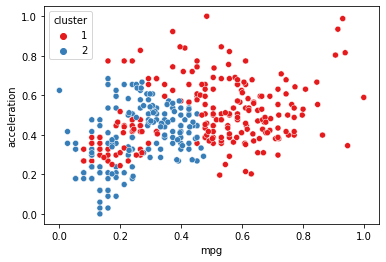

In [100]:
sns.scatterplot(x='mpg', y='acceleration', data=dfpred, hue= 'cluster', palette='Set1')

In [97]:
dfnorm.head()

,mpg,acceleration,cluster
name,,,
chevrolet chevelle malibu,0.239362,0.238095,0
buick skylark 320,0.159574,0.208333,0
plymouth satellite,0.239362,0.178571,0
amc rebel sst,0.186170,0.238095,0
ford torino,0.212766,0.148810,0


In [71]:
model.predict(X=[[0.2, 0.3]])

array([0], dtype=int32)

# Interpretar Modelo

> 1. Si tuvieras que ponerle nombre a cada grupo, ¿cuál le darías?
> 2. ¿En qué te basas para ello?

In [68]:
dfpred.groupby('cluster').mean()

,mpg,acceleration
cluster,,
0,0.166689,0.292023
1,0.694149,0.552064
2,0.323764,0.599848
3,0.462739,0.403274


# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [X] La importancia de la **Suma de Cuadrados** como concepto fundamental de la estadística para medir el **error**.
- [X] Entender la necesidad de **Normalizar** los datos al emplear un algoritmo que involucra el **cálculo de distancias**.
- [X] Entender que la estadística no es más que una forma de aproximarse a la realidad. Y esta aproximación no es una ciencia exacta, sino **subjetiva**.
- [X] Empezar a distinguir, más aún, que la programación es una herramienta hacia un fin.
- [X] Al principio, nos salen muchos errores programando y creemos que no valemos para esto. Sin embargo, en este momento del programa, veremos que existen unos **patrones que siempre se cumplen en los errores** y empezaremos a **entender la máquina**.
- [X] Una vez más, nos daremos cuenta de que existen **distintos modelos para realizar el Análisis de Cluster**. De la misma manera que en el anterior capítulo también existían diversos Modelos de Regresión.